In [155]:
using PyPlot
using Plots
using Test

# 18.330 Problem set 2 (spring 2020)

## Submission deadline: 11:59pm on Monday, February 17


#### Exercise 1: Fixed-point iteration

In this question we will find the roots of the function

$$f(α, x) = x^3 - \alpha x + \sqrt{2}$$

by using fixed-point iterations.

1. Define a Julia function for $f$ and draw it; make an interactive
 visualization as $\alpha$ changes.
    [Make sure to fix the plot limits so as to be able to see
    what's going on.]

2. When $\alpha$ varies, the number of real roots can change.
    For which approximate value of $\alpha$ does the number of real roots change?
    How many real roots are there?

3. When $\alpha = 2.5$, approximately where are the roots? From now on fix $\alpha$
    to this value.

The simplest thing we can try is $g(x) = x + f(α, x)$, since then a
    fixed point of $g$ is a root of $f$.

4. Plot the function $g(x)$ and the function $y=x$. Taking into account the results stated in the slides,
    which root do you expect to be able to calculate by iterating $g$? Fix an initial
    condition and show that it does converge there.

5. What is the rate of convergence to that root?

6. What happens with the initial condition $x=1.1$? Why?

7. Draw a [cobweb diagram](https://en.wikipedia.org/wiki/Cobweb_plot) to illustrate this
    behaviour.

8. By using algebraic transformations, find fixed-point iterations $g$ that
    converge to the other two roots.

    There are two alternative approaches
    you can take here.
    The first is to find other iteration schemes,
    $x = h(x)$ by algebraically rearranging $f(\alpha, x) = 0$ to isolate
    an $x$ on one side.
    The second is to introduce the generalized
    function $g(c, x) := x + c f(x)$.
    Make an interactive plot of $g(c,x)$ and $y = x$ as $c$ varies.
    What do you notice about the slope of $g(c, x)$ at the
    fixed points as $c$ changes? Can you use
    this to change the stabilities of the fixed points in the iteration scheme?

9. (**Extra credit**) Call $\alpha_c$ the **critical value** of $\alpha$ at which the number of roots
    changes. [This is called a **bifurcation point**.] Find $\alpha_c$ numerically.

#### draw f(x)

In [8]:
function f(α, x)
    x*x*x - α*x + √2
end

f (generic function with 1 method)

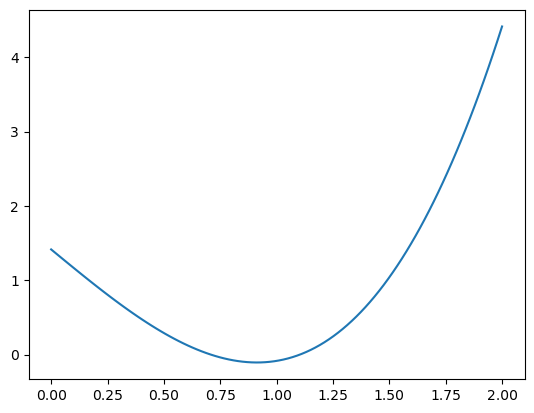

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f98dd5cc990>

In [34]:
x = range(0, 2, length=100)
y = map(xx->f(2.5, xx), x)
plot(x, y)

#### draw g(x) and apply the iteration

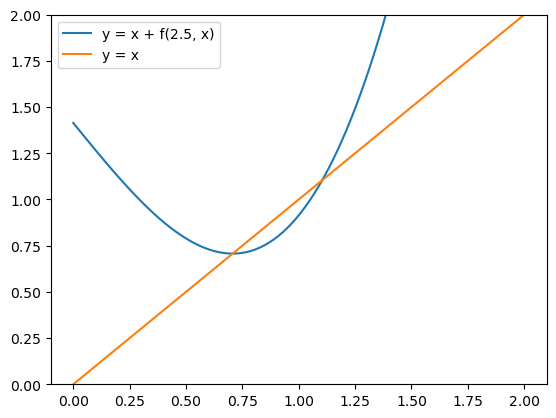

(0.0, 2.0)

In [36]:
α = 2.5
function g(x) 
    x + f(α, x)
end
g_x = map(xx->g(xx), x)
idenfunc_x = map(xx->xx, x)
plot(x, g_x)
plot(x, idenfunc_x)
legend(["y = x + f(2.5, x)", "y = x"])
ylim([0, 2])

In [37]:
old_x = 0.25
xn = [old_x]
iter_count = 0
while true
    new_x = g(old_x)
    push!(xn, new_x)
    iter_count += 1
    if abs(new_x - old_x) < 1e-9 || iter_count > 100
        break
    end
    old_x = new_x
end
xn

10-element Array{Float64,1}:
 0.25
 1.0548385623730951
 1.0056581239517577
 0.9227969725419467
 0.8158297897524625
 0.7334674381180186
 0.7085991708531469
 0.7071115091722067
 0.7071067812339673
 0.7071067811865477

#### Exercise 2: Defining a type for Polynomials

Although we have already used polynomials, we haven't had a way
to say "this object is a polynomial". For this we need to **define a new type**!

1. Define a type `Polynomial` to represent a polynomial. It should
    have fields `degree` and `coefficients`.

2. Write a **constructor** function with the same name (`Polynomial`)
    that accepts a vector of coefficients and builds a `Polynomial`
    object whose degree it automatically calculates.

3. Write a `show` method to display the polynomial nicely.

4. Write a function to evaluate the polynomial at a point `x`, as follows:

    ```julia
    function (p::Polynomial)(x)
        # fill in
    end
    ```

    Then if you have an object `p` of type polynomial, writing e.g. `p(3)`
    will evaluate that polynomial at the value 3.

5. Write a function `derivative` that takes a polynomial and returns a new polynomial
    that is its derivative.

6. Julia contains a module `Test` (in the standard library -- no installation
    required) for testing that code is correct.

    Write a few tests of the functionality you have defined using
    tests of the form

    ```julia
    @test a == b
    ```

    E.g. to test the sum of two `Polynomial`s you can write

    ```julia
    @test Polynomial([1, 2]) + Polynomial([3, 4]) == Polynomial([4, 6])
    ```

    When you run these tests, you should see the message `Test passed`.

    To create the tests, do the calculations by hand.

#### define polynomial type

In [38]:
struct Polynomial
    degree::Int
    coeffi::AbstractVector
end

In [58]:
function Polynomial(vec::AbstractVector)
    Polynomial(length(vec)-1, vec)
end

Polynomial

In [60]:
Base.show(io::IO, p::Polynomial) = print(io, prod([string(ai)*"x^"*string(i-1)*" " for (i, ai) in enumerate(p.coeffi)]))

In [68]:
function (p::Polynomial)(x)
    p_x = 0.0
    for i in 1:p.degree+1
        p_x += p.coeffi[i] * x^(i-1)
    end
    p_x
 end

In [71]:
p = Polynomial([1, 2, 3])
@test p(2)==17

Test Passed

In [112]:
function derivative(p::Polynomial)
    if p.degree < 1
        return Polynomial(0, [0])
    end
    new_degree = p.degree - 1
    new_vec = p.coeffi[2:end] .* collect(1:p.degree)
    Polynomial(new_degree, new_vec)
end

derivative (generic function with 1 method)

In [113]:
import Base: ==
function ==(x::Polynomial, y::Polynomial)
    x.degree == y.degree || return false 
    x.coeffi == y.coeffi || return false
    return true
end

== (generic function with 187 methods)

In [114]:
@test derivative(Polynomial([1, 2, 3])) == Polynomial([2, 6])
@test derivative(Polynomial([1])) == Polynomial(0, [0])

Test Passed

#### Exercise 3: Newton method
1. Write a function `newton` to implement the Newton method. It should
    take a function $f$, its derivative $f\prime$ and an initial guess $x_0$.
    It should terminate when the residual is less than some tolerance, or when
    the number of iterations is too large.

2. Write a specialised method of `newton` for polynomials that accepts
    an object of type `Polynomial`, written `p::Polynomial` and calculates its
    derivative automatically.

3. Taking the same polynomial as in exercise 1,
    confirm that the Newton method has quadratic convergence by
    verifying numerically the defining limit.

4. Can you find different roots by taking different initial conditions
    $x_0$? How will you know if/when you have found all of the roots like this?

The Newton method works fantastically well when the starting point is close enough to a root,
    but can also behave very badly, as follows.

5. How many roots does the function $f(z) = z^3 - 1$ have in the complex plane
    $\mathbb{C}$? Where are they?

6. Calculate those roots using the Newton method with *complex* starting points $a + ib$
    forming a square grid in the complex plane. Store the imaginary part of the resulting root
    (or final value, if no root is reached) in a matrix.

7. Plot the matrix with the `heatmap` function and plot the true roots as
points. What kind of object are you seeing? What does this imply for the Newton method?
    What happens close to the roots?

#### Newton's Method

In [116]:
function newton(f::Polynomial, x₀ = 0, ϵ = 1e-9, max_iter = 100)
    f′ = derivative(f)
    old_x = x₀
    xn = [old_x]
    iter_count = 0
    while true
        new_x = old_x - f(old_x)/f′(old_x)
        push!(xn, new_x)
        iter_count += 1
        (abs(new_x - old_x) < ϵ || iter_count > max_iter) && break
        old_x = new_x
    end
    return xn
end

newton (generic function with 4 methods)

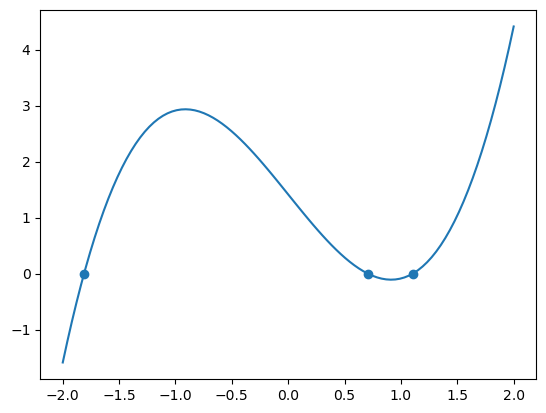

PyObject <matplotlib.collections.PathCollection object at 0x7f98dd517e90>

In [130]:
f_x = Polynomial([√2, -2.5, 0, 1])
root₁ = newton(f_x, -20.0)[end]
root₂ = newton(f_x, 0.0)[end]
root₃ = newton(f_x, 10.0)[end]
x = range(-2, 2, length=100)
plot(x, map(xx->f_x(xx), x))
scatter([root₁, root₂, root₃], [f_x(root₁), f_x(root₂), f_x(root₃)])

#### newton's method can behave badly

In [222]:
ppx = 100
meshgrid = fill(1.0 + 1.0im, ppx, ppx) 
for (i, x) in enumerate(range(-2, 2, length=ppx))
    for (j, y) in enumerate(range(-2, 2, length=ppx))
        meshgrid[i, j] = y + x*1im
    end
end

In [227]:
roots = rand(ppx, ppx)
f_z = Polynomial([-1, 0, 0, 1])
for i in 1:ppx, j in 1:ppx
    roots[i, j] = imag(newton(f_z, meshgrid[i, j])[end])
end

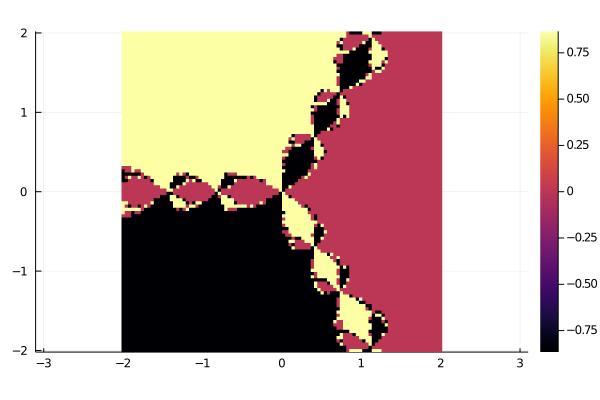

In [228]:
heatmap(range(-2, 2, length=ppx), range(-2, 2, length=ppx), roots, ratio=1)

#### Exercise 4: Aberth method

Newton's method only finds one root at a time. The [Aberth method](https://en.wikipedia.org/wiki/Aberth_method)
  calculates them all at once! Given estimates $(z_k)$ for all roots of a polynomial it calculates
  a new estimate via $z_k = z_k - w_k$, where

  $$w_{k}={\frac{\frac{p(z_{k})}{p'(z_{k})}}{1-{\frac{p(z_{k})}{p'(z_{k})}}\cdot \sum_{j\neq k}{\frac {1}{z_{k}-z_{j}}}}}.$$

  In order to guarantee convergence the initial guess must be chosen in a special way. Cauchy's bound tells us that all
  the roots of a polynomial $p(x) = a_0 + a_1x + \cdots + a_n x^n$ must have absolute value less than

  $$U = 1+\max \left( \left \lvert \frac{a_{n-1}}{a_{n}} \right\rvert,\left\lvert \frac{a_{n-2}}{a_{n}} \right\rvert,\ldots ,\left\lvert \frac{a_{0}}{a_{n}}\right\rvert \right)$$

  and a lower bound of

  $$L = \frac{1}{1+\max \left\{ \left \lvert \frac{a_{n}}{a_{0}} \right\rvert,\left\lvert \frac{a_{n-1}}{a_{0}} \right\rvert,\ldots ,\left\lvert \frac{a_{1}}{a_{0}}\right\rvert \right\} }$$

  The starting points should be chosen so that their absolute value lies in between these bounds.

1. Implement a function `poly_bounds` that takes in a `Polynomial` and returns $L$ and $U$.

2. Use `poly_bounds` to write a function `initialize_points` that finds a suitable starting group of points. Do this
    by choosing $\rho$s sampled from a uniform distribution over $[L, U]$ and $\theta$s sampled from a uniform
    distribution over $[0, 2\pi]$. Then calculate $z = \rho e^{i\theta}$.

    [Hint: The `rand()` function generates uniform
    random numbers between $0$ and $1$. Use `rand` to write a function `uniform(a, b)` to generate uniform numbers between
    $a$ and $b$.]

3. Implement the Aberth method for a polynomial $p$ which takes in values
from `initialize_points` and terminates either after a certain
number of iterations or when a certain tolerance is met.
Test your function for the polynomials we have considered so far.

4. Make an interactive visualization of the progress over time on some random
    polynomials of degree 10 or 20.

5. Find numerically the order of convergence of the method.

6. Try polynomials with multiple roots, such as $(x^2 + 1)^3$. What happens?

#### Aberth method : find roots all at a time

In [233]:
function poly_bounds(p::Polynomial)
    U = 1 + maximum(abs.(p.coeffi[1:end-1]./p.coeffi[end]))
    L = 1 / (1 + maximum(abs.(p.coeffi[2:end]/p.coeffi[1])))
    return (L, U)
end

poly_bounds (generic function with 1 method)

In [234]:
function uniform(a, b)
    return rand()*(b-a) + a
end

uniform (generic function with 1 method)

In [245]:
sum([1, 2, 3])

6

In [247]:
function calculate_w(p::Polynomial, p′::Polynomial, z)
    w = similar(z)
    for k in 1:p.degree
        t = p(z[k])/p′(z[k]) 
        s = sum([1/(z[k] - z[j]) for j in 1:length(z) if j != k])
        w[k] = t/(1 - t*s)
    end
    return w
end

calculate_w (generic function with 1 method)

In [242]:
function initialize_points(p::Polynomial)
    L, U = poly_bounds(p)
    n = p.degree
    points = []
    for i in 1:n
        ρ = uniform(L, U)
        θ = uniform(0, 2π)
        push!(points, ρ*exp(θ*1.0im))
    end
    return points
end

initialize_points (generic function with 1 method)

In [250]:
any([1, 2, 4] .< 2)

true

In [251]:
function Aberth(p::Polynomial, ϵ = 1e-9, max_iter = 100)
    p′ = derivative(p)
    old_points = initialize_points(p)
    new_points = similar(old_points)
    points = []
    iter_num = 0
    while true
        w = calculate_w(p, p′, old_points)
        new_points = old_points - w
        iter_num += 1
        push!(points, new_points)
        if !any(abs.(new_points - old_points) .> ϵ) || iter_num > max_iter
            break
        end
        old_points = new_points
    end
    return points
end

Aberth (generic function with 3 methods)

In [257]:
f₁ = Polynomial([√2, -2.5, 0, 1])
f₂ = Polynomial([-1, 0, 0, 1])
f₃ = Polynomial([1, 0, 3, 0, 3, 0, 1])

1x^0 0x^1 3x^2 0x^3 3x^4 0x^5 1x^6 

In [258]:
Aberth(f₁)[end]

3-element Array{Complex{Float64},1}:
  1.1041845831180512 + 3.155443620884047e-29im
  0.7071067811865478 + 0.0im
 -1.8112913643045987 - 2.0194839173657902e-28im

In [254]:
Aberth(f₂)[end]

3-element Array{Complex{Float64},1}:
 -0.5 - 0.8660254037844387im
 -0.5 + 0.8660254037844387im
  1.0 + 0.0im

In [259]:
Aberth(f₃)[end]

6-element Array{Complex{Float64},1}:
 2.0013671964072124e-6 - 1.0000011555014308im
  5.670666484867138e-8 + 0.9999975888863046im
  5.181055223912352e-7 - 0.9999998083565298im
  2.384361825685735e-6 + 1.0000013968939463im
 -2.172358016113981e-6 + 1.0000014666658497im
 3.68671336503182e-173 - 0.999998965320655im

In [ ]:
Aberth()